In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = '/content/AmazonBooks - Sheet1.csv'
df = pd.read_csv(url)
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
595,Live Free Or Die: America (and the World) on t...,Sean Hannity,4.8,20153,15,2020,Non Fiction
596,Burn After Writing,Sharon Jones,4.6,26423,8,2020,Non Fiction
597,Get Out of Your Head: Stopping the Spiral of T...,Jennie Allen,4.7,12879,14,2020,Non Fiction
598,Human Body Activity Book for Kids: Hands-On Fu...,Katie Stokes,4.7,14128,5,2020,Non Fiction


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         600 non-null    object 
 1   Author       600 non-null    object 
 2   User Rating  600 non-null    float64
 3   Reviews      600 non-null    int64  
 4   Price        600 non-null    int64  
 5   Year         600 non-null    int64  
 6   Genre        600 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 32.9+ KB


In [5]:
# Check for missing values
print(df.isnull().sum())


Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [6]:
print(df.duplicated().sum())

0


In [7]:
# Calculate mean, median, and mode
mean_rating = df['User Rating'].mean()
median_rating = df['User Rating'].median()
mode_rating = df['User Rating'].mode()[0]

print(f"Mean User Rating: {mean_rating}")
print(f"Median User Rating: {median_rating}")
print(f"Mode User Rating: {mode_rating}")


Mean User Rating: 4.627333333333333
Median User Rating: 4.7
Mode User Rating: 4.8


In [8]:
# Calculate mean, median, and mode
mean_reviews = df['Reviews'].mean()
median_reviews = df['Reviews'].median()
mode_reviews = df['Reviews'].mode()[0]

print(f"Mean Reviews: {mean_reviews}")
print(f"Median Reviews: {median_reviews}")
print(f"Mode Reviews: {mode_reviews}")



Mean Reviews: 13941.73
Median Reviews: 9059.5
Mode Reviews: 8580


In [9]:
# Calculate mean, median, and mode
mean_price = df['Price'].mean()
median_price = df['Price'].median()
mode_price = df['Price'].mode()[0]


print(f"Mean Price: ${mean_price}")
print(f"Median Price: ${median_price}")
print(f"Mode Price: {mode_price}")


Mean Price: $12.92
Median Price: $11.0
Mode Price: 8


In [10]:

mode_year = df['Year'].mode()[0]
print(f"Mode Year: {mode_year}")


Mode Year: 2009


In [11]:
# Display the frequency of each genre
genre_counts = df['Genre'].value_counts()
print(genre_counts)

# Calculate the mode of the Genre column
mode_genre = df['Genre'].mode()[0]
print(f"Most Common Genre: {mode_genre}")


Genre
Non Fiction    337
Fiction        263
Name: count, dtype: int64
Most Common Genre: Non Fiction


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


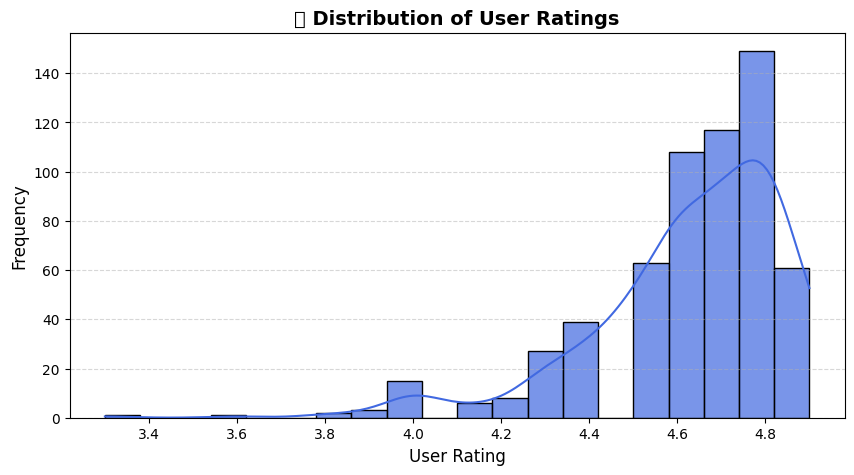

In [12]:

# Plotting the distribution
plt.figure(figsize=(10, 5))

# Stylish histogram with smooth KDE curve
sns.histplot(df['User Rating'], bins=20, kde=True, color="royalblue", edgecolor="black", alpha=0.7)

# Titles and labels
plt.title("⭐ Distribution of User Ratings", fontsize=14, fontweight="bold")
plt.xlabel("User Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Custom grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()



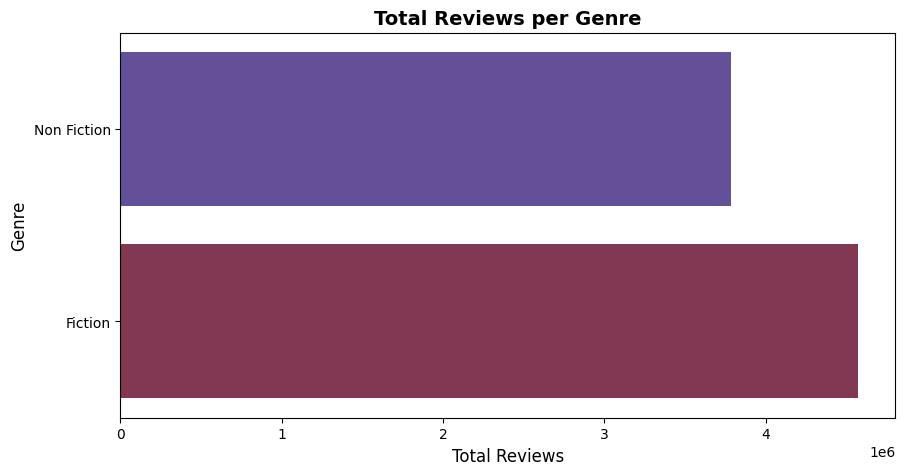

In [13]:
genre_reviews = df.groupby('Genre')['Reviews'].sum().sort_values()

# Set figure size
plt.figure(figsize=(10, 5))

# Simple bar plot
sns.barplot(x=genre_reviews.values, y=genre_reviews.index,hue=genre_reviews.index, palette="twilight",legend = False)

# Titles and labels
plt.title('Total Reviews per Genre', fontsize=14, fontweight='bold')
plt.xlabel('Total Reviews', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Show plot
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


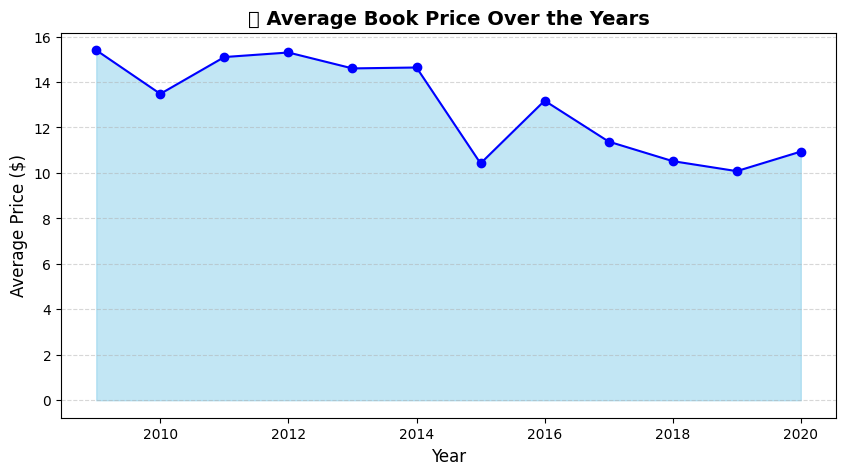

In [14]:
avg_price_per_year = df.groupby('Year')['Price'].mean()

# Create the area plot
plt.figure(figsize=(10, 5))
plt.fill_between(avg_price_per_year.index, avg_price_per_year.values, color="skyblue", alpha=0.5)
plt.plot(avg_price_per_year.index, avg_price_per_year.values, marker='o', color="blue")

# Add labels and title
plt.title("💰 Average Book Price Over the Years", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Price ($)", fontsize=12)
plt.grid(axis='y', linestyle="--", alpha=0.5)

# Show the plot
plt.show()